# Analysis of ABCtoolbox results

ABCtoolbox output includes:  
- retained simulations
- marginal posterior densities
- marginal posterior densities charecterisitcs
- joint posterior densities

In this Notebook, I:
- reformat the marginal posterior densities charecterisitcs file so it is easily readable
- plot a heatmap of the joint posterior densities
- calculate the probability NEA > NWA
- plot the marginal priors, truncated priors, and posterior denstities

## Setup code

In [11]:
import sys, os
sys.path.append('/vol_c/src/ABC_results_AJ/')
print(sys.executable)
print(sys.version)
print(sys.version_info)
print(sys.path)

/opt/anaconda3/bin/python
3.6.4 |Anaconda, Inc.| (default, Jan 16 2018, 18:10:19) 
[GCC 7.2.0]
sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)
['', '/opt/anaconda3/lib/python36.zip', '/opt/anaconda3/lib/python3.6', '/opt/anaconda3/lib/python3.6/lib-dynload', '/opt/anaconda3/lib/python3.6/site-packages', '/opt/anaconda3/lib/python3.6/site-packages/IPython/extensions', '/home/agladstein/.ipython', '/mnt/src/ABC_results_AJ/', '/vol_c/src/ABC_results_AJ/', '/vol_c/src/ABC_results_AJ/']


In [12]:
%%bash
# sudo /opt/anaconda3/bin/conda install rpy2
# sudo /opt/anaconda3/bin/conda install -c conda-forge ggplot

In [13]:
from sys import argv
import pandas as pd
# from ggplot import *
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True, style="ticks")
import numpy as np
# import rpy2
# %load_ext rpy2.ipython

from functions.assessment_functions import *

## Create PCA and density plots of summary statistics

In [ ]:
%%bash
if [ -e "/mnt/ABC_AJmodels_instant_newreal/input_ABCtoolbox_M2_HPC_OSG_2_pca.pdf" ]; then
    echo "File exists"
else 
    head -1 /mnt/ABC_AJmodels_instant_newreal/input_ABCtoolbox_M2_HPC_OSG_2.txt >/mnt/ABC_AJmodels_instant_newreal/header_M2.txt
    Rscript /mnt/src/macsswig_simsaj/dist_plot_stats.R /mnt/ABC_AJmodels_instant_newreal/input_ABCtoolbox_M2_HPC_OSG_2.txt /mnt/ABC_AJmodels_instant_newreal/real_output_M23_IBD.summary /mnt/ABC_AJmodels_instant_newreal/header_M2.txt
fi 

In [4]:
%%bash
ls /mnt/ABC_AJmodels_instant_newreal/*pdf

/mnt/ABC_AJmodels_instant_newreal/input_ABCtoolbox_M2_HPC_OSG_2_params.pdf
/mnt/ABC_AJmodels_instant_newreal/input_ABCtoolbox_M2_HPC_OSG_2_pca.pdf
/mnt/ABC_AJmodels_instant_newreal/input_ABCtoolbox_M2_HPC_OSG_2_stats.pdf


## Model Choice

### Method 1
See `/mnt/ABC_AJmodels_instant_newreal/ABC_modelchoice_chr1.ipynb`
- filter correlated stats
- run ABCtoolbox method to find best stats for model choice
- use sets of stats with power greater than 0.5

In [38]:
path = '/mnt/ABC_AJmodels_instant_newreal'
os.chdir(path)
abc_config_name = "test_ABC_modelchoice5.txt"

[simName, obsName, outputPrefix, params_str] = read_abc_config(abc_config_name)
print(simName)

[confusionMatrix_name,
 modelChoiceValidation_name,
 modelFit_name] = get_modelchocie_files(outputPrefix)

print(confusionMatrix_name)
print(modelChoiceValidation_name)
print(modelFit_name)

test_ABC_modelchoice5.txt
keepPowerStats_input_ABCtoolbox_M1_HPC_OSG_2.txt;keepPowerStats_input_ABCtoolbox_M2_HPC_OSG_2.txt;keepPowerStats_input_ABCtoolbox_M3_HPC_OSG_2.txt
ABC_modelchoice5_1275807confusionMatrix.txt
ABC_modelchoice5_1275807modelChoiceValidation.txt
ABC_modelchoice5_1275807modelFit.txt


In [6]:
modelFit = pd.read_csv(modelFit_name, sep = '\t')
modelFit

,dataSet,model1_marginalDensity,model2_marginalDensity,model3_marginalDensity,model1_TukeyDepth,model2_TukeyDepth,model3_TukeyDepth,model1_BayesFactor,model2_BayesFactor,model3_BayesFactor,model1_posteriorProbability,model2_posteriorProbability,model3_posteriorProbability,chosenModel
0,0,3.639560e-30,3.705390e-27,2.992580e-27,0.003003,0.002002,0.001001,0.000543,1.23669,0.806836,0.000543,0.552911,0.446546,2


In [7]:
confusionMatrix = pd.read_csv(confusionMatrix_name, sep = '\t')
confusionMatrix

,trueModel,model1_raw,model2_raw,model3_raw,model1_prop,model2_prop,model3_prop,falsePositives,falseNegatives
0,0,69,60,204,0.207207,0.180180,0.612613,0.027027,0.792793
1,1,12,107,214,0.036036,0.321321,0.642643,0.202703,0.678679
2,2,6,75,252,0.018018,0.225225,0.756757,0.627628,0.243243


In [8]:
modelChoiceValidation = pd.read_csv(modelChoiceValidation_name, sep = '\t')
modelChoiceValidation.head()

,trueModel,obsNum,model1_marginalDensity,model2_marginalDensity,model3_marginalDensity,model1_BayesFactor,model2_BayesFactor,model3_BayesFactor,model1_posteriorProbability,model2_posteriorProbability,model3_posteriorProbability,chosenModel
0,0,1273944,1.343180e-31,2.861390e-31,3.786440e-31,2.020480e-01,0.557817,0.900553,1.680870e-01,0.358076,0.473837,2
1,1,1273746,8.134000e-34,5.782590e-32,7.552860e-32,6.099530e-03,0.757459,1.288020,6.062550e-03,0.430997,0.562941,2
2,2,1274989,7.550730e-30,1.357150e-29,3.175340e-29,1.665910e-01,0.345296,1.503310,1.428020e-01,0.256669,0.600529,2
3,0,1269131,1.748000e-27,4.753440e-27,1.110710e-26,1.102110e-01,0.369769,1.708410,9.927000e-02,0.269950,0.630780,2
4,1,1268917,3.088680e-38,3.626570e-30,8.325860e-30,2.584150e-09,0.435579,2.295790,2.584150e-09,0.303417,0.696583,2


Model 3 is the true model, but Model 2 is chosen as the best model with a larger Bayes Factor than Model 3.

In [9]:
chosenM2_M3true = modelChoiceValidation.loc[(modelChoiceValidation['trueModel'] == 2) & (modelChoiceValidation['model2_BayesFactor'] > modelChoiceValidation['model3_BayesFactor']) & (modelChoiceValidation['chosenModel'] == 1)]
chosenM2_M3true.head()

,trueModel,obsNum,model1_marginalDensity,model2_marginalDensity,model3_marginalDensity,model1_BayesFactor,model2_BayesFactor,model3_BayesFactor,model1_posteriorProbability,model2_posteriorProbability,model3_posteriorProbability,chosenModel
8,2,1267886,3.002250e-31,5.764080e-31,5.306880e-31,2.711820e-01,0.693705,0.605371,2.133310e-01,0.409578,0.377091,1
14,2,1264254,2.248180e-37,4.807230e-32,3.301810e-32,2.772440e-06,1.455930,0.686838,2.772430e-06,0.592822,0.407175,1
17,2,1249249,8.184250e-39,1.756580e-31,1.698280e-31,2.368910e-08,1.034330,0.966810,2.368910e-08,0.508437,0.491563,1
20,2,1248606,4.327740e-31,1.885890e-30,1.389750e-30,1.321190e-01,1.034760,0.599378,1.167000e-01,0.508543,0.374757,1
29,2,1230614,9.061950e-33,6.662330e-32,5.782110e-32,7.281930e-02,0.996116,0.763968,6.787660e-02,0.499027,0.433096,1


Model 1 is the true model, but Model 2 is chosen as the best model with a larger Bayes Factor than Model 1.

In [10]:
chosenM2_M1true = modelChoiceValidation.loc[(modelChoiceValidation['trueModel'] == 0) & (modelChoiceValidation['model2_BayesFactor'] > modelChoiceValidation['model1_BayesFactor']) & (modelChoiceValidation['chosenModel'] == 1)]
chosenM2_M1true.head()

,trueModel,obsNum,model1_marginalDensity,model2_marginalDensity,model3_marginalDensity,model1_BayesFactor,model2_BayesFactor,model3_BayesFactor,model1_posteriorProbability,model2_posteriorProbability,model3_posteriorProbability,chosenModel
6,0,1263328,6.471750e-27,6.266150e-25,6.669430e-26,0.009335,8.56429,0.105348,0.009248,0.895444,0.095307,1
15,0,1252127,2.529520e-29,1.323880e-28,9.067680e-29,0.113399,1.14155,0.575057,0.101849,0.533049,0.365102,1
21,0,1249175,2.664720e-27,1.012560e-26,9.306190e-27,0.137132,0.84585,0.727597,0.120594,0.458244,0.421161,1
33,0,1240283,9.009560e-27,2.518760e-25,1.126850e-25,0.024713,2.06973,0.431934,0.024117,0.674239,0.301644,1
48,0,1197378,1.787230e-22,2.221610e-20,1.506240e-20,0.004794,1.45765,0.672582,0.004771,0.593107,0.402122,1


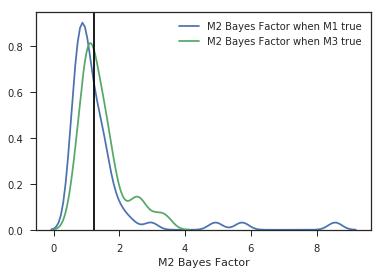

In [11]:
sns.kdeplot(chosenM2_M1true['model2_BayesFactor'], label = 'M2 Bayes Factor when M1 true');
sns.kdeplot(chosenM2_M3true['model2_BayesFactor'], label = 'M2 Bayes Factor when M3 true');
plt.xlabel('M2 Bayes Factor');
plt.axvline(float(modelFit['model2_BayesFactor']), color='black', label = 'model 2');

Proportion of Model 2 Bayes factor from real data greater than cross validation Model 2 Bayes factors incorrectly chosen when Model 1 is true

In [12]:
len(chosenM2_M1true.loc[chosenM2_M1true['model2_BayesFactor'] < float(modelFit['model2_BayesFactor'])])/chosenM2_M1true.shape[0]

0.65

Proportion of Model 2 Bayes factor from real data greater than cross validation Model 2 Bayes factors incorrectly chosen when Model 3 is true

In [13]:
len(chosenM2_M3true.loc[chosenM2_M3true['model2_BayesFactor'] < float(modelFit['model2_BayesFactor'])])/chosenM2_M3true.shape[0]

0.49333333333333335

### Method 2 (sanity check)
See `/mnt/ABC_AJmodels_instant_newreal/ABC_modelchoice_chr1.ipynb`
- use best stats from original data

In [43]:
path = '/mnt/ABC_AJmodels_instant_newreal/ModelChoice_orig_stats'
os.chdir(path)
abc_config_name = "test_ABC_modelchoice.txt"

[simName, obsName, outputPrefix, params_str] = read_abc_config(abc_config_name)
print(simName)

[confusionMatrix_name,
 modelChoiceValidation_name,
 modelFit_name] = get_modelchocie_files(outputPrefix)

print(confusionMatrix_name)
print(modelChoiceValidation_name)
print(modelFit_name)

test_ABC_modelchoice.txt
keepPowerStats_input_ABCtoolbox_M1_HPC_OSG_2.txt;keepPowerStats_input_ABCtoolbox_M2_HPC_OSG_2.txt;keepPowerStats_input_ABCtoolbox_M3_HPC_OSG_2.txt
ABC_modelchoice5_1275807confusionMatrix.txt
ABC_modelchoice5_1275807modelChoiceValidation.txt
ABC_modelchoice5_1275807modelFit.txt


In [44]:
modelFit = pd.read_csv(modelFit_name, sep = '\t')
modelFit

,dataSet,model1_marginalDensity,model2_marginalDensity,model3_marginalDensity,model1_TukeyDepth,model2_TukeyDepth,model3_TukeyDepth,model1_BayesFactor,model2_BayesFactor,model3_BayesFactor,model1_posteriorProbability,model2_posteriorProbability,model3_posteriorProbability,chosenModel
0,0,6.338700e-44,2.446080e-31,1.717530e-31,0.001001,0,0,1.522400e-13,1.42419,0.702154,1.522400e-13,0.587491,0.412509,2


In [45]:
confusionMatrix = pd.read_csv(confusionMatrix_name, sep = '\t')
confusionMatrix

,trueModel,model1_raw,model2_raw,model3_raw,model1_prop,model2_prop,model3_prop,falsePositives,falseNegatives
0,0,11,7,15,0.333333,0.212121,0.454545,0.000000,0.666667
1,1,0,17,16,0.000000,0.515152,0.484848,0.227273,0.484848
2,2,0,8,25,0.000000,0.242424,0.757576,0.469697,0.242424


In [46]:
modelChoiceValidation = pd.read_csv(modelChoiceValidation_name, sep = '\t')
modelChoiceValidation.head()

,trueModel,obsNum,model1_marginalDensity,model2_marginalDensity,model3_marginalDensity,model1_BayesFactor,model2_BayesFactor,model3_BayesFactor,model1_posteriorProbability,model2_posteriorProbability,model3_posteriorProbability,chosenModel
0,0,1268496,1.045310e-42,7.150420e-35,8.495040e-35,6.681230e-09,0.841717,1.188050,6.681230e-09,0.457028,0.542972,2
1,1,1262882,1.106540e-40,4.043180e-25,7.066720e-25,9.959920e-17,0.572143,1.747810,9.959920e-17,0.363926,0.636074,2
2,2,1250082,5.665930e-44,4.295220e-26,3.220820e-26,7.538460e-19,1.333580,0.749862,7.538460e-19,0.571474,0.428526,1
3,0,1247162,6.360170e-39,1.410410e-38,8.342410e-39,2.833480e-01,0.959295,0.407657,2.207880e-01,0.489612,0.289600,1
4,1,1201758,3.115790e-51,1.231010e-37,4.823900e-38,1.818480e-14,2.551910,0.391864,1.818480e-14,0.718461,0.281539,1


Model 3 is the true model, but Model 2 is chosen as the best model with a larger Bayes Factor than Model 3.

In [47]:
chosenM2_M3true = modelChoiceValidation.loc[(modelChoiceValidation['trueModel'] == 2) & (modelChoiceValidation['model2_BayesFactor'] > modelChoiceValidation['model3_BayesFactor']) & (modelChoiceValidation['chosenModel'] == 1)]
chosenM2_M3true.head()

,trueModel,obsNum,model1_marginalDensity,model2_marginalDensity,model3_marginalDensity,model1_BayesFactor,model2_BayesFactor,model3_BayesFactor,model1_posteriorProbability,model2_posteriorProbability,model3_posteriorProbability,chosenModel
2,2,1250082,5.665930e-44,4.295220e-26,3.220820e-26,7.538460e-19,1.33358,0.749862,7.538460e-19,0.571474,0.428526,1
8,2,1204428,6.885590e-35,2.938900e-30,1.918340e-30,1.417590e-05,1.53194,0.652726,1.417570e-05,0.605047,0.394939,1
17,2,1163062,7.787140e-43,4.498400e-33,4.438110e-33,8.713850e-11,1.01358,0.986598,8.713850e-11,0.503373,0.496627,1
20,2,1143321,1.479990e-48,4.175090e-33,3.429330e-33,1.946230e-16,1.21747,0.821378,1.946230e-16,0.549035,0.450965,1
23,2,1099407,6.503210e-55,3.195330e-27,2.082820e-27,1.232100e-28,1.53414,0.651833,1.232100e-28,0.605388,0.394612,1


Model 1 is the true model, but Model 2 is chosen as the best model with a larger Bayes Factor than Model 1.

In [48]:
chosenM2_M1true = modelChoiceValidation.loc[(modelChoiceValidation['trueModel'] == 0) & (modelChoiceValidation['model2_BayesFactor'] > modelChoiceValidation['model1_BayesFactor']) & (modelChoiceValidation['chosenModel'] == 1)]
chosenM2_M1true.head()

,trueModel,obsNum,model1_marginalDensity,model2_marginalDensity,model3_marginalDensity,model1_BayesFactor,model2_BayesFactor,model3_BayesFactor,model1_posteriorProbability,model2_posteriorProbability,model3_posteriorProbability,chosenModel
3,0,1247162,6.360170e-39,1.410410e-38,8.342410e-39,2.833480e-01,0.959295,0.407657,2.207880e-01,0.489612,0.289600,1
6,0,1233987,1.130940e-39,4.059140e-28,2.975740e-28,1.607620e-12,1.364080,0.733097,1.607620e-12,0.577002,0.422998,1
30,0,1017580,3.146170e-29,1.147260e-25,5.147350e-26,1.893010e-04,2.227470,0.448543,1.892650e-04,0.690160,0.309651,1
36,0,940356,8.602930e-47,7.903640e-30,3.993280e-30,7.231230e-18,1.979240,0.505245,7.231230e-18,0.664343,0.335657,1
57,0,611081,3.421380e-35,6.011570e-29,4.677250e-29,3.200890e-07,1.285280,0.778040,3.200890e-07,0.562417,0.437583,1


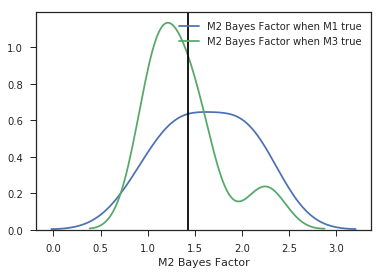

In [49]:
sns.kdeplot(chosenM2_M1true['model2_BayesFactor'], label = 'M2 Bayes Factor when M1 true');
sns.kdeplot(chosenM2_M3true['model2_BayesFactor'], label = 'M2 Bayes Factor when M3 true');
plt.xlabel('M2 Bayes Factor');
plt.axvline(float(modelFit['model2_BayesFactor']), color='black', label = 'model 2');

Proportion of Model 2 Bayes factor from real data greater than cross validation Model 2 Bayes factors incorrectly chosen when Model 1 is true

In [50]:
len(chosenM2_M1true.loc[chosenM2_M1true['model2_BayesFactor'] < float(modelFit['model2_BayesFactor'])])/chosenM2_M1true.shape[0]

0.42857142857142855

Proportion of Model 2 Bayes factor from real data greater than cross validation Model 2 Bayes factors incorrectly chosen when Model 3 is true

In [51]:
len(chosenM2_M3true.loc[chosenM2_M3true['model2_BayesFactor'] < float(modelFit['model2_BayesFactor'])])/chosenM2_M3true.shape[0]

0.625

### Method 3
See /mnt/ABC_AJmodels_instant_newreal/ABC_modelchoice_chr1.ipynb
- filter correlated stats
- run ABCtoolbox method to find best stats for model choice
- use sets of stats with power greater than 0.5
- reduce parameters to infer

In [70]:
path = '/mnt/ABC_AJmodels_instant_newreal/ReduceParams'
os.chdir(path)
abc_config_name = "test_ABC_modelchoice.txt"

[simName, obsName, outputPrefix, params_str] = read_abc_config(abc_config_name)
print(simName)

[confusionMatrix_name,
 modelChoiceValidation_name,
 modelFit_name] = get_modelchocie_files(outputPrefix)

print(confusionMatrix_name)
print(modelChoiceValidation_name)
print(modelFit_name)

test_ABC_modelchoice.txt
keepPowerStats_input_ABCtoolbox_M1_HPC_OSG_2.txt;keepPowerStats_input_ABCtoolbox_M2_HPC_OSG_2.txt;keepPowerStats_input_ABCtoolbox_M3_HPC_OSG_2.txt
ABC_modelchoice_1275807confusionMatrix.txt
ABC_modelchoice_1275807modelChoiceValidation.txt
ABC_modelchoice_1275807modelFit.txt


In [71]:
modelFit = pd.read_csv(modelFit_name, sep = '\t')
modelFit

,dataSet,model1_marginalDensity,model2_marginalDensity,model3_marginalDensity,model1_TukeyDepth,model2_TukeyDepth,model3_TukeyDepth,model1_BayesFactor,model2_BayesFactor,model3_BayesFactor,model1_posteriorProbability,model2_posteriorProbability,model3_posteriorProbability,chosenModel
0,0,9.862130e-31,1.322690e-27,6.559810e-28,0.003003,0.002002,0.001001,0.000498,2.01332,0.495576,0.000498,0.668141,0.331361,2


In [72]:
confusionMatrix = pd.read_csv(confusionMatrix_name, sep = '\t')
confusionMatrix

,trueModel,model1_raw,model2_raw,model3_raw,model1_prop,model2_prop,model3_prop,falsePositives,falseNegatives
0,0,65,77,191,0.195195,0.231231,0.573574,0.027027,0.804805
1,1,8,141,184,0.024024,0.423423,0.552553,0.234234,0.576577
2,2,10,79,244,0.030030,0.237237,0.732733,0.563063,0.267267


In [73]:
modelChoiceValidation = pd.read_csv(modelChoiceValidation_name, sep = '\t')
modelChoiceValidation.head()

,trueModel,obsNum,model1_marginalDensity,model2_marginalDensity,model3_marginalDensity,model1_BayesFactor,model2_BayesFactor,model3_BayesFactor,model1_posteriorProbability,model2_posteriorProbability,model3_posteriorProbability,chosenModel
0,0,1274909,8.424160e-32,1.035400e-31,4.529400e-31,0.151383,0.192746,2.412060,0.131479,0.161599,0.706922,2
1,1,1274574,1.562430e-31,1.377860e-29,3.876060e-30,0.008850,3.417060,0.278156,0.008772,0.773605,0.217623,1
2,2,1274744,8.258180e-30,1.313130e-27,2.462200e-27,0.002187,0.531531,1.863350,0.002183,0.347059,0.650759,2
3,0,1273565,2.171890e-30,1.902150e-30,3.276210e-30,0.419416,0.349139,0.804170,0.295485,0.258787,0.445728,2
4,1,1272045,1.508070e-34,8.486870e-35,9.609420e-35,0.833357,0.343736,0.407740,0.454553,0.255806,0.289641,0


Model 3 is the true model, but Model 2 is chosen as the best model with a larger Bayes Factor than Model 3.

In [74]:
chosenM2_M3true = modelChoiceValidation.loc[(modelChoiceValidation['trueModel'] == 2) & (modelChoiceValidation['model2_BayesFactor'] > modelChoiceValidation['model3_BayesFactor']) & (modelChoiceValidation['chosenModel'] == 1)]
chosenM2_M3true.head()

,trueModel,obsNum,model1_marginalDensity,model2_marginalDensity,model3_marginalDensity,model1_BayesFactor,model2_BayesFactor,model3_BayesFactor,model1_posteriorProbability,model2_posteriorProbability,model3_posteriorProbability,chosenModel
8,2,1272683,8.233750e-31,6.451230e-29,1.822570e-29,0.009952,3.386640,0.278955,0.009854,0.772035,0.218112,1
17,2,1247256,5.121260e-28,1.187100e-27,2.988360e-28,0.344648,1.463820,0.175865,0.256311,0.594126,0.149563,1
35,2,1218300,1.722500e-26,1.687790e-22,1.277760e-22,0.000058,1.320720,0.756981,0.000058,0.569100,0.430842,1
38,2,1216877,3.185300e-25,3.561450e-24,2.808290e-24,0.050007,1.139000,0.723791,0.047625,0.532492,0.419883,1
44,2,1208683,1.562480e-28,3.302850e-28,2.243890e-28,0.281692,0.867719,0.461200,0.219782,0.464588,0.315631,1


Model 1 is the true model, but Model 2 is chosen as the best model with a larger Bayes Factor than Model 1.

In [75]:
chosenM2_M1true = modelChoiceValidation.loc[(modelChoiceValidation['trueModel'] == 0) & (modelChoiceValidation['model2_BayesFactor'] > modelChoiceValidation['model1_BayesFactor']) & (modelChoiceValidation['chosenModel'] == 1)]
chosenM2_M1true.head()

,trueModel,obsNum,model1_marginalDensity,model2_marginalDensity,model3_marginalDensity,model1_BayesFactor,model2_BayesFactor,model3_BayesFactor,model1_posteriorProbability,model2_posteriorProbability,model3_posteriorProbability,chosenModel
6,0,1272994,1.788170e-33,4.541860e-33,3.130110e-33,0.233078,0.923467,0.494486,0.189021,0.480105,0.330873,1
15,0,1247650,2.629890e-26,8.599600e-26,6.326220e-26,0.176197,0.960193,0.563359,0.149802,0.489846,0.360351,1
18,0,1226345,7.458870e-34,9.883040e-34,7.647190e-34,0.425486,0.654244,0.440965,0.298485,0.395494,0.306021,1
21,0,1226195,1.182240e-29,4.722890e-29,4.213580e-29,0.132293,0.875287,0.713547,0.116837,0.466748,0.416415,1
27,0,1220322,1.380390e-32,1.734040e-32,1.160670e-32,0.476867,0.682408,0.372675,0.322891,0.405614,0.271495,1


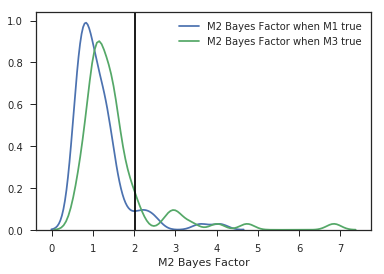

In [76]:
sns.kdeplot(chosenM2_M1true['model2_BayesFactor'], label = 'M2 Bayes Factor when M1 true');
sns.kdeplot(chosenM2_M3true['model2_BayesFactor'], label = 'M2 Bayes Factor when M3 true');
plt.xlabel('M2 Bayes Factor');
plt.axvline(float(modelFit['model2_BayesFactor']), color='black', label = 'model 2');

Proportion of Model 2 Bayes factor from real data greater than cross validation Model 2 Bayes factors incorrectly chosen when Model 1 is true

In [77]:
len(chosenM2_M1true.loc[chosenM2_M1true['model2_BayesFactor'] < float(modelFit['model2_BayesFactor'])])/chosenM2_M1true.shape[0]

0.922077922077922

Proportion of Model 2 Bayes factor from real data greater than cross validation Model 2 Bayes factors incorrectly chosen when Model 3 is true

In [78]:
len(chosenM2_M3true.loc[chosenM2_M3true['model2_BayesFactor'] < float(modelFit['model2_BayesFactor'])])/chosenM2_M3true.shape[0]

0.8607594936708861

## Correlated Stats Pruned

### Model 2

In [14]:
path = '/vol_c/ABC_AJmodels_instant_newreal'
os.chdir(path)
abc_config_name = "test_ABC_correlatedstats6.txt"

[simName, obsName, outputPrefix, params_str] = read_abc_config(abc_config_name)
print(simName)

[BestSimsParamStats_name,
 MarginalPosteriorDensities_name,
 MarginalPosteriorCharacteristics_name,
 jointPosterior_name,
 MarginalPosteriorCharacteristics_reformat_name,
modelFit_name] = get_results_files(outputPrefix)
print(BestSimsParamStats_name)
print(MarginalPosteriorDensities_name)
print(jointPosterior_name)
print(MarginalPosteriorCharacteristics_reformat_name)
print(modelFit_name)

test_ABC_correlatedstats6.txt
input_ABCtoolbox_M2_HPC_OSG_2.txt
ABC_correlatedstats6_1446125_pruneCorStats_90_model0_BestSimsParamStats_Obs0.txt
ABC_correlatedstats6_1446125_pruneCorStats_90_model0_MarginalPosteriorDensities_Obs0.txt
ABC_correlatedstats6_1446125_pruneCorStats_90_model0_jointPosterior_8_9_Obs0.txt
ABC_correlatedstats6_1446125_pruneCorStats_90_model0_MarginalPosteriorCharacteristicsReformat.txt
ABC_correlatedstats6_1446125_pruneCorStats_90_modelFit.txt


#### Reformat marginal posterior densities charecterisitcs file

In [15]:
df_chrs_reformat = reformat_Characteristics(MarginalPosteriorCharacteristics_name)
df_chrs_reformat

parsing ABC_correlatedstats6_1446125_pruneCorStats_90_model0_MarginalPosteriorCharacteristics.txt


/vol_c/src/ABC_results_AJ/functions/assessment_functions.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_param['param'] = param


,mode,mean,median,q50_lower,q50_upper,q90_lower,q90_upper,q95_lower,q95_upper,q99_lower,q99_upper,HDI50_lower,HDI50_upper,HDI90_lower,HDI90_upper,HDI95_lower,HDI95_upper,HDI99_lower,HDI99_upper,param
0,12.909100,11.625500,11.880800,7.751050,15.633200,3.548860,18.910900,2.855900,19.416400,2.192680,19.873900,9.909090,17.580500,4.454550e+00,19.694100,3.545450e+00,19.996600,2.372300e+00,20.00000,Asc_NAF
0,9.818180,10.611900,10.433200,6.631590,14.544700,3.151130,18.545100,2.620250,19.197400,2.134590,19.820600,4.997470,12.818200,2.636360e+00,17.981400,2.272730e+00,18.803300,2.000000e+00,19.65250,Asc_NEU
0,6.000000,10.170600,9.881890,6.073830,14.107000,3.038460,18.241400,2.558760,18.999100,2.121480,19.765100,3.363640,11.033300,2.188400e+00,17.181800,2.000000e+00,18.241400,2.000000e+00,19.55160,Asc_NCHB
0,0.092424,0.083989,0.085993,0.077007,0.092687,0.062214,0.098205,0.058280,0.099057,0.052879,0.099799,0.084091,0.097815,6.759320e-02,0.100000,6.221430e-02,0.100000,5.469110e-02,0.10000,daf
0,4.395960,4.359610,4.367000,4.102230,4.617940,3.826580,4.876860,3.773960,4.928850,3.718010,4.983110,4.165990,4.678280,3.825020e+00,4.875250,3.772920e+00,4.927770,3.719710e+00,4.98471,Log10_NAF
0,4.717170,4.323550,4.398260,4.011260,4.692080,3.453390,4.925670,3.304750,4.960980,3.101250,4.991700,4.335290,4.929290,3.651200e+00,5.000000,3.453390e+00,5.000000,3.168740e+00,5.00000,Log10_NCEU
0,3.646460,3.940590,3.816390,3.547160,4.345320,3.239410,4.859430,3.155390,4.925200,3.044380,4.983900,3.343210,3.959600,3.252530e+00,4.871600,3.212120e+00,4.970490,3.079210e+00,5.00000,Log10_NCHB
0,4.195960,4.792170,4.726450,3.969520,5.630540,3.278330,6.407330,3.154920,6.537190,3.034930,6.663310,3.504540,5.089330,3.254010e+00,6.382310,3.130810e+00,6.512640,3.018690e+00,6.64620,Log10_NWA
0,5.063640,5.358740,5.346120,4.738870,5.994720,4.194260,6.516410,4.106660,6.599120,4.023730,6.677580,4.531820,5.785330,4.204550e+00,6.526110,4.122730e+00,6.614710,4.033060e+00,6.68636,Log10_NEA
0,3.129350,3.507330,3.401950,2.815180,4.100170,2.234220,5.171250,2.128770,5.503930,2.028680,6.088290,2.541150,3.773300,2.000000e+00,4.774660,2.000000e+00,5.171250,2.000000e+00,5.86673,Log10_NAg


#### Priors, truncated, and posterior distributions

In [16]:
prior = pd.read_csv(simName, sep = '\t')
prior.head()

,sim,Asc_NAF,Asc_NEU,Asc_NCHB,daf,Log10_NAF,Log10_NANC,Log10_NCEU,Log10_NCHB,Log10_NWA,...,FST_AfAs_ASC_m,FST_EuAs_ASC,FST_eAwA_ASC,FST_eAEu_ASC,FST_eAJ_ASC,FST_eAM_ASC,FST_MJ_ASC,FST_wAEu_ASC,FST_wAJ_ASC,FST_wAM_ASC
0,0528171496036015_1151,14,17,8,0.052222,4.280442,4.002598,4.391129,4.266279,5.365600,...,0.104465,0.057020,0.002686,0.150827,0.008299,0.026635,0.024294,0.150963,0.009419,0.028186
1,0528171496034246_897,8,4,14,0.053425,4.404868,3.581722,3.123198,4.217510,6.341655,...,0.478686,0.407555,0.001390,0.297388,0.000290,0.083451,0.085553,0.299524,0.001247,0.085223
2,0528171496010621_206,3,14,2,0.078333,3.923814,3.483730,3.096910,3.823735,3.288249,...,0.339033,0.070902,0.001375,0.084863,0.008412,0.025681,0.021827,0.083589,0.008920,0.026500
3,0529171496063882_1988,7,3,7,0.072770,4.854895,4.376741,4.335538,4.876541,6.579049,...,0.059878,0.036267,-0.000017,0.027780,0.000749,0.036373,0.034299,0.029181,0.001784,0.037691
4,0529171496063882_1991,9,17,2,0.064633,4.903692,4.056524,3.635685,3.772908,5.502117,...,0.091493,0.026036,0.000894,0.067956,0.004092,0.003518,0.003223,0.066293,0.004558,0.003142


In [17]:
truncated = pd.read_csv(BestSimsParamStats_name, sep = '\t')
truncated.head()

,Sim_num,Dist,Asc_NAF,Asc_NEU,Asc_NCHB,daf,Log10_NAF,Log10_NCEU,Log10_NCHB,Log10_NWA,...,FST_AfAs_ASC_m,FST_EuAs_ASC,FST_eAwA_ASC,FST_eAEu_ASC,FST_eAJ_ASC,FST_eAM_ASC,FST_MJ_ASC,FST_wAEu_ASC,FST_wAJ_ASC,FST_wAM_ASC
0,23,74533600.0,5,13,17,0.076029,4.26283,4.57862,3.61321,4.30494,...,0.220007,0.170124,-0.000300,0.176386,0.000825,0.001011,0.001988,0.176816,0.000408,0.001515
1,102,49229600.0,5,4,5,0.087403,4.97663,4.42085,3.01912,6.20675,...,0.267957,0.127303,0.006482,0.151521,0.018406,0.023591,0.002097,0.146635,0.016520,0.021877
2,339,39340100.0,17,3,5,0.057562,4.27655,3.31806,3.41664,6.63939,...,0.289477,0.105329,-0.000158,0.073787,0.004285,0.019499,0.025207,0.071067,0.003714,0.020997
3,405,27171100.0,10,4,7,0.062405,3.82073,4.24957,3.66717,3.08350,...,0.189929,0.124689,0.021863,0.126657,0.011762,0.013374,0.001696,0.134205,0.013356,0.016041
4,526,82716000.0,9,15,14,0.072339,4.19165,4.69258,3.83594,5.20930,...,0.072436,0.093768,-0.000451,0.101605,0.002258,0.021541,0.020686,0.100555,0.000688,0.020075


In [18]:
posterior = pd.read_csv(MarginalPosteriorDensities_name, sep = '\t')
posterior.head()

,number,Asc_NAF,Asc_NAF.density,Asc_NEU,Asc_NEU.density,Asc_NCHB,Asc_NCHB.density,daf,daf.density,Log10_NAF,...,Teu_as,Teu_as.density,TA,TA.density,TMJ,TMJ.density,TAEW,TAEW.density,Tm,Tm.density
0,1,2.00000,0.024967,2.00000,0.036374,2.00000,0.040444,0.050000,1.21222,3.70001,...,402.000,0.000601,20.0000,0.043261,21.000,0.000891,2.00000,0.019405,3.00000,0.003251
1,2,2.18182,0.026827,2.18182,0.038767,2.18182,0.043292,0.050505,1.37876,3.71314,...,439.313,0.000641,20.1616,0.045882,32.899,0.000964,2.32323,0.020870,3.32323,0.003642
2,3,2.36364,0.028650,2.36364,0.041083,2.36364,0.046060,0.051010,1.55826,3.72627,...,476.626,0.000680,20.3232,0.048396,44.798,0.001037,2.64646,0.022308,3.64646,0.004061
3,4,2.54545,0.030419,2.54545,0.043301,2.54545,0.048721,0.051515,1.75040,3.73940,...,513.939,0.000717,20.4848,0.050782,56.697,0.001109,2.96970,0.023705,3.96970,0.004510
4,5,2.72727,0.032121,2.72727,0.045402,2.72727,0.051253,0.052020,1.95468,3.75254,...,551.253,0.000751,20.6465,0.053027,68.596,0.001180,3.29293,0.025049,4.29293,0.004988


In [19]:
param_indexes = get_param_indexes(params_str)
params = get_col_names(param_indexes, prior)

In [20]:
df_chrs_reformat.head()

,mode,mean,median,q50_lower,q50_upper,q90_lower,q90_upper,q95_lower,q95_upper,q99_lower,q99_upper,HDI50_lower,HDI50_upper,HDI90_lower,HDI90_upper,HDI95_lower,HDI95_upper,HDI99_lower,HDI99_upper,param
0,12.909100,11.625500,11.880800,7.751050,15.633200,3.548860,18.910900,2.85590,19.416400,2.192680,19.873900,9.909090,17.580500,4.454550,19.69410,3.545450,19.99660,2.372300,20.00000,Asc_NAF
0,9.818180,10.611900,10.433200,6.631590,14.544700,3.151130,18.545100,2.62025,19.197400,2.134590,19.820600,4.997470,12.818200,2.636360,17.98140,2.272730,18.80330,2.000000,19.65250,Asc_NEU
0,6.000000,10.170600,9.881890,6.073830,14.107000,3.038460,18.241400,2.55876,18.999100,2.121480,19.765100,3.363640,11.033300,2.188400,17.18180,2.000000,18.24140,2.000000,19.55160,Asc_NCHB
0,0.092424,0.083989,0.085993,0.077007,0.092687,0.062214,0.098205,0.05828,0.099057,0.052879,0.099799,0.084091,0.097815,0.067593,0.10000,0.062214,0.10000,0.054691,0.10000,daf
0,4.395960,4.359610,4.367000,4.102230,4.617940,3.826580,4.876860,3.77396,4.928850,3.718010,4.983110,4.165990,4.678280,3.825020,4.87525,3.772920,4.92777,3.719710,4.98471,Log10_NAF


TypeError: cannot convert the series to <class 'float'>

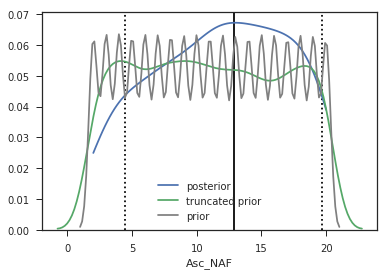

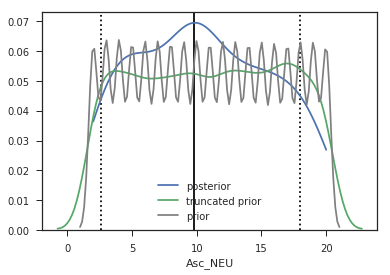

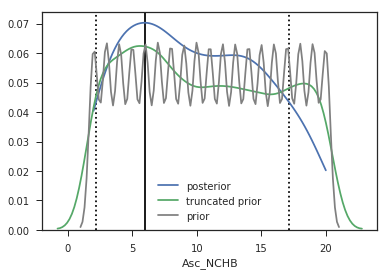

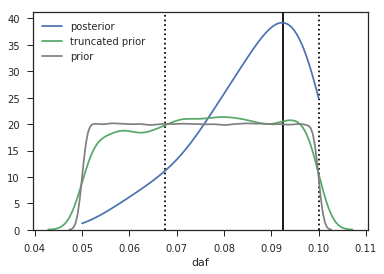

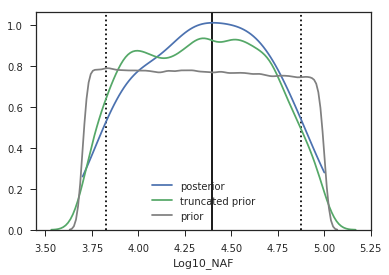

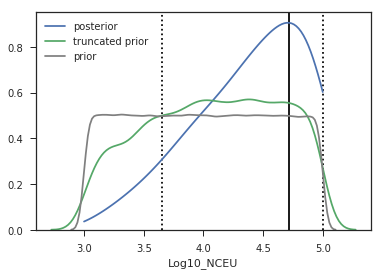

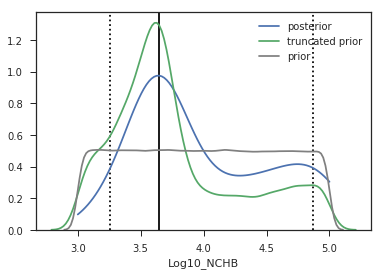

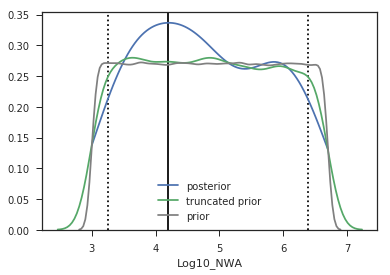

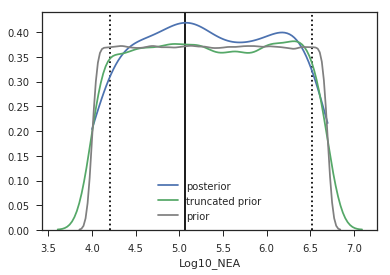

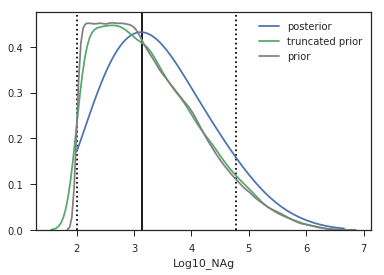

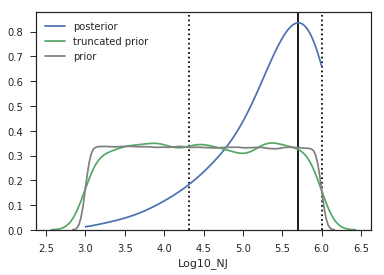

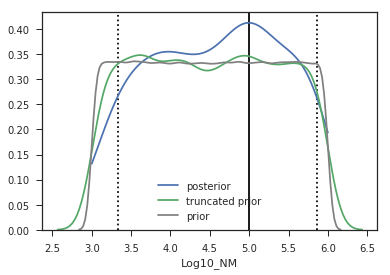

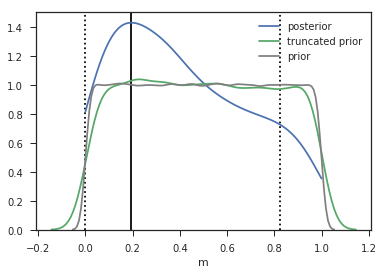

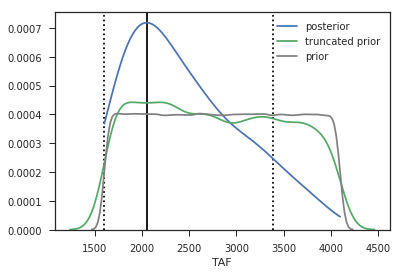

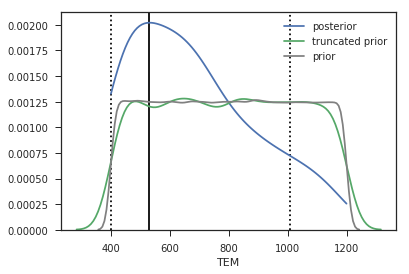

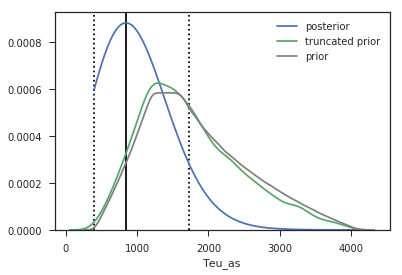

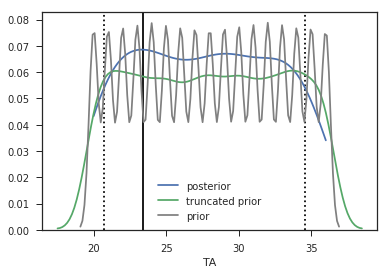

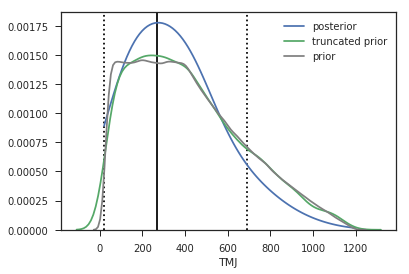

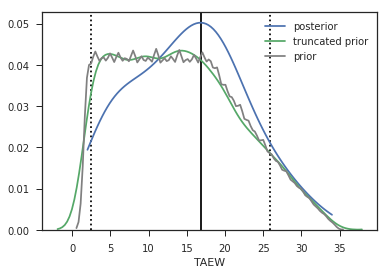

In [21]:
for param in params:
    plot_param_densities(posterior, truncated, prior, df_chrs_reformat, param)

#### Joint density plot

Create joint density dataframe

In [22]:
joint_NEA_NWA_df = create_joint_df(jointPosterior_name)
joint_NEA_NWA_df.head()

,number,Log10_NWA,Log10_NEA,density,HDI
0,0,3.00000,4.0,2.64562,0.999800
1,1,3.03737,4.0,2.88943,0.999544
2,2,3.07475,4.0,3.13849,0.999187
3,3,3.11212,4.0,3.39144,0.998674
4,4,3.14949,4.0,3.64696,0.997970


In [23]:
prob = get_prob_NEA_grtr_NWA(joint_NEA_NWA_df)
print(prob)

0.6734618390852632


/vol_c/src/ABC_results_AJ/functions/assessment_functions.py:246: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Z = z.reshape(len(NEA), len(NWA))


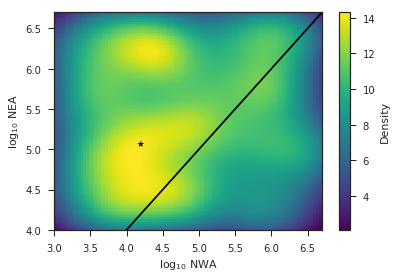

In [24]:
plot_joint_mtpltlb(joint_NEA_NWA_df, df_chrs_reformat)

## PLS

### Model 2

In [26]:
path = '/mnt/ABC_AJmodels_instant_newreal/PLS'
os.chdir(path)
abc_config_name = "test_ABC_estimate_M2_PLS.txt"

[simName, obsName, outputPrefix, params_str] = read_abc_config(abc_config_name)
print(simName)

[BestSimsParamStats_name,
 MarginalPosteriorDensities_name,
 MarginalPosteriorCharacteristics_name,
 jointPosterior_name,
 MarginalPosteriorCharacteristics_reformat_name,
modelFit] = get_results_files(outputPrefix)
print(BestSimsParamStats_name)
print(MarginalPosteriorDensities_name)
print(jointPosterior_name)
print(MarginalPosteriorCharacteristics_reformat_name)

test_ABC_estimate_M2_PLS.txt
input_ABCtoolbox_M2_HPC_OSG_2.transformed_10pls.txt
ABC_M2_estimate_1446125_10pls_1000ret_model0_BestSimsParamStats_Obs0.txt
ABC_M2_estimate_1446125_10pls_1000ret_model0_MarginalPosteriorDensities_Obs0.txt
ABC_M2_estimate_1446125_10pls_1000ret_model0_jointPosterior_8_9_Obs0.txt
ABC_M2_estimate_1446125_10pls_1000ret_model0_MarginalPosteriorCharacteristicsReformat.txt


In [27]:
param_indexes = get_param_indexes(params_str)
params = get_col_names(param_indexes, prior)

#### Reformat marginal posterior densities charecterisitcs file

In [28]:
df_chrs_reformat_pls = reformat_Characteristics(MarginalPosteriorCharacteristics_name)
df_chrs_reformat_pls

parsing ABC_M2_estimate_1446125_10pls_1000ret_model0_MarginalPosteriorCharacteristics.txt


/mnt/src/ABC_results_AJ/functions/assessment_functions.py:130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_param['param'] = param


,mode,mean,median,q50_lower,q50_upper,q90_lower,q90_upper,q95_lower,q95_upper,q99_lower,q99_upper,HDI50_lower,HDI50_upper,HDI90_lower,HDI90_upper,HDI95_lower,HDI95_upper,HDI99_lower,HDI99_upper,param
0,14.545500,11.507100,11.581800,7.833990,15.244800,4.059750,18.639000,3.269770,19.249000,2.338410,19.832600,8.636360,16.015700,4.454550,18.999300,3.727270,19.630100,2.478260,19.909100,Asc_NAF
0,4.545450,9.647700,9.186320,5.559610,13.242200,2.818930,18.366100,2.428110,19.128700,2.090560,19.810300,3.000000,10.091900,2.000000,16.934700,2.000000,18.366100,2.000000,19.630100,Asc_NEU
0,3.636360,7.527520,6.281960,4.040560,10.171100,2.454010,16.804600,2.233170,18.073600,2.048080,19.471300,2.000000,6.281960,2.000000,14.730500,2.000000,16.804600,2.000000,19.051000,Asc_NCHB
0,0.092424,0.085720,0.088214,0.080384,0.093513,0.063600,0.098269,0.057298,0.099075,0.051566,0.099799,0.086111,0.097315,0.070449,0.100000,0.063600,0.100000,0.053022,0.100000,daf
0,4.264650,4.345550,4.333690,4.100830,4.593440,3.837150,4.870570,3.782220,4.923990,3.721040,4.981280,4.045740,4.533840,3.837890,4.871280,3.786230,4.927780,3.732840,4.992860,Log10_NAF
0,4.515150,4.296760,4.375370,4.026410,4.628990,3.440850,4.886250,3.295160,4.936280,3.094230,4.985540,4.222730,4.767680,3.637790,5.000000,3.440850,5.000000,3.159870,5.000000,Log10_NCEU
0,3.606060,3.735400,3.678890,3.473980,3.930530,3.218460,4.487120,3.147530,4.669080,3.046380,4.904190,3.399960,3.838380,3.116890,4.323230,3.070710,4.540970,3.000000,4.831070,Log10_NCHB
0,3.822220,4.770340,4.763500,3.913370,5.599660,3.253330,6.363910,3.140650,6.509950,3.031620,6.655990,3.504540,5.183300,3.168180,6.266120,3.056060,6.413580,3.000000,6.615650,Log10_NWA
0,6.290910,5.472030,5.499300,4.869100,6.114450,4.245900,6.556460,4.134900,6.623170,4.030210,6.683370,5.391160,6.577270,4.436600,6.700000,4.245900,6.700000,4.058450,6.700000,Log10_NEA
0,3.035240,3.151810,3.101220,2.699010,3.546250,2.229210,4.275120,2.130100,4.527540,2.030020,5.017240,2.598800,3.435220,2.070580,4.047810,2.000000,4.275120,2.000000,4.820920,Log10_NAg


#### Priors, truncated, and posterior distributions

In [29]:
prior_pls = pd.read_csv(simName, sep = '\t')
prior_pls.head()

,sim,Asc_NAF,Asc_NEU,Asc_NCHB,daf,Log10_NAF,Log10_NANC,Log10_NCEU,Log10_NCHB,Log10_NWA,...,LinearCombination_0,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9
0,5.281710e+14,14,17,8,0.052222,4.28044,4.00260,4.39113,4.26628,5.36560,...,1.125010,0.86040,2.423170,-1.240080,0.845003,-1.125590,0.981563,-3.112930,-2.369540,1.570150
1,5.281710e+14,8,4,14,0.053426,4.40487,3.58172,3.12320,4.21751,6.34165,...,10.571300,-7.41682,4.473280,-0.965474,4.215160,-0.527522,1.450910,-3.491500,-3.786360,2.616750
2,5.281710e+14,3,14,2,0.078333,3.92381,3.48373,3.09691,3.82373,3.28825,...,-5.533650,-3.17681,-4.261020,-1.686030,2.272880,1.961840,-1.393840,-0.596993,-0.301039,0.893576
3,5.291710e+14,7,3,7,0.072770,4.85489,4.37674,4.33554,4.87654,6.57905,...,-9.785690,4.81581,-0.450111,-0.057790,1.622090,-1.117200,-0.433007,0.778963,-0.293196,-0.013859
4,5.291710e+14,9,17,2,0.064633,4.90369,4.05652,3.63568,3.77291,5.50212,...,0.886967,4.40390,1.310930,1.441910,0.822246,-0.875576,0.238202,-4.099040,-1.115370,1.816170


In [30]:
truncated_pls = pd.read_csv(BestSimsParamStats_name, sep = '\t')
truncated_pls.head()

,Sim_num,Dist,Asc_NAF,Asc_NEU,Asc_NCHB,daf,Log10_NAF,Log10_NCEU,Log10_NCHB,Log10_NWA,...,LinearCombination_0,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9
0,264,16.8687,8,15,8,0.097583,3.93671,4.35744,4.06247,5.20517,...,-14.4694,0.878387,-5.08654,1.787270,3.31941,3.30940,1.75454,1.881890,-1.808710,-2.009360
1,1117,15.8772,19,3,20,0.098055,4.92612,4.05835,3.89597,4.36596,...,-14.1798,0.576015,-4.30848,1.535540,2.54265,2.58288,1.78050,1.356290,0.131996,-2.163160
2,1178,15.7531,16,6,19,0.097908,4.43821,4.94385,4.28883,5.64311,...,-13.6000,0.248529,-5.32594,0.187016,2.82822,3.45323,2.10797,0.942264,-1.200940,-2.999570
3,2635,13.8534,6,3,4,0.097245,4.77986,3.89840,3.92355,5.42171,...,-12.5832,0.729135,-2.31277,1.542970,3.18700,2.62611,1.40639,1.475900,-0.904433,-0.654759
4,3373,16.4925,5,7,4,0.077518,4.52802,3.82230,3.36342,6.30811,...,-13.6125,-2.511240,-1.17663,2.896810,3.33754,4.47957,1.29533,2.474460,-0.298918,-1.051090


In [31]:
posterior_pls = pd.read_csv(MarginalPosteriorDensities_name, sep = '\t')
posterior_pls.head()

,number,Asc_NAF,Asc_NAF.density,Asc_NEU,Asc_NEU.density,Asc_NCHB,Asc_NCHB.density,daf,daf.density,Log10_NAF,...,Teu_as,Teu_as.density,TA,TA.density,TMJ,TMJ.density,TAEW,TAEW.density,Tm,Tm.density
0,1,2.00000,0.013209,2.00000,0.055210,2.00000,0.103986,0.050000,3.01493,3.70001,...,402.000,0.000592,20.0000,0.034464,21.000,0.001136,2.00000,0.017954,3.00000,0.001714
1,2,2.18182,0.014878,2.18182,0.058040,2.18182,0.109286,0.050505,3.14045,3.71314,...,439.313,0.000638,20.1616,0.036640,32.899,0.001226,2.32323,0.019395,3.32323,0.001995
2,3,2.36364,0.016658,2.36364,0.060677,2.36364,0.114057,0.051010,3.24845,3.72627,...,476.626,0.000682,20.3232,0.038716,44.798,0.001315,2.64646,0.020832,3.64646,0.002310
3,4,2.54545,0.018543,2.54545,0.063102,2.54545,0.118236,0.051515,3.33815,3.73940,...,513.939,0.000724,20.4848,0.040669,56.697,0.001400,2.96970,0.022254,3.96970,0.002661
4,5,2.72727,0.020521,2.72727,0.065299,2.72727,0.121775,0.052020,3.40941,3.75253,...,551.253,0.000763,20.6465,0.042482,68.596,0.001481,3.29293,0.023649,4.29293,0.003049


TypeError: cannot convert the series to <class 'float'>

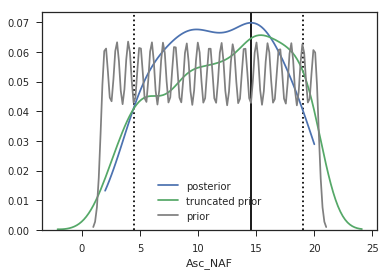

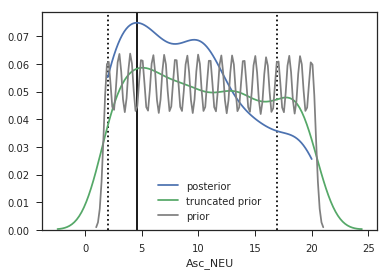

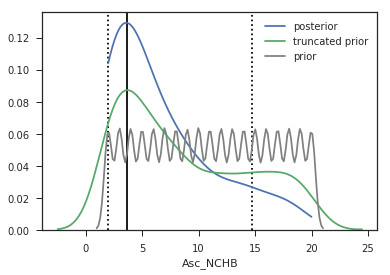

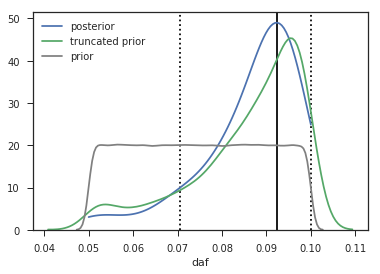

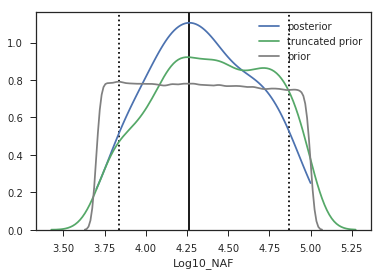

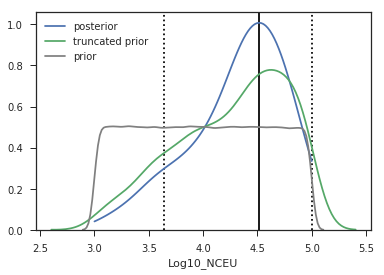

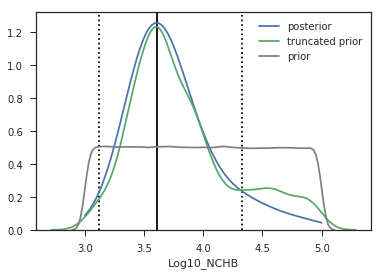

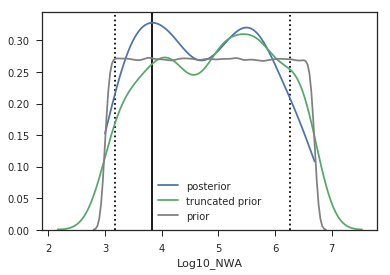

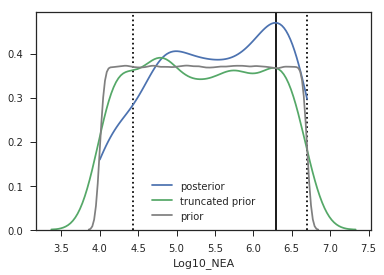

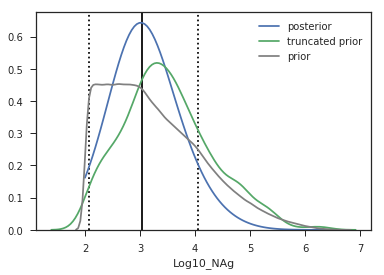

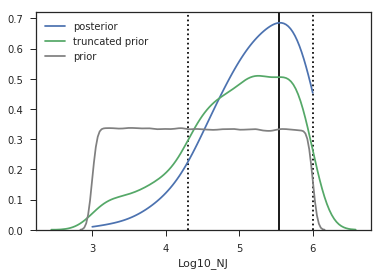

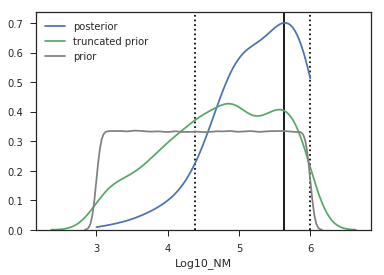

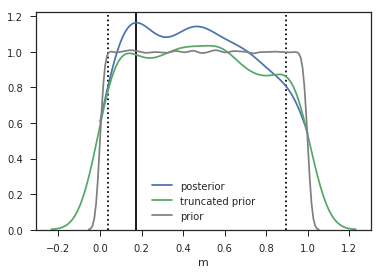

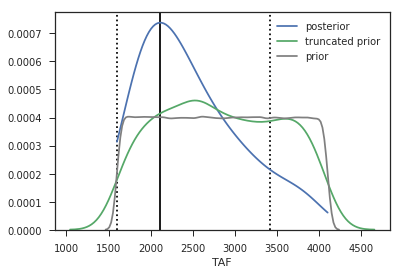

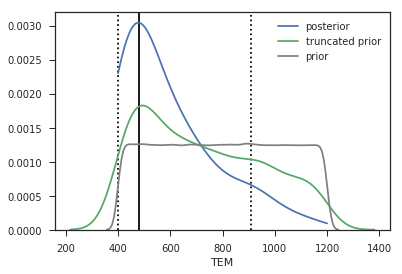

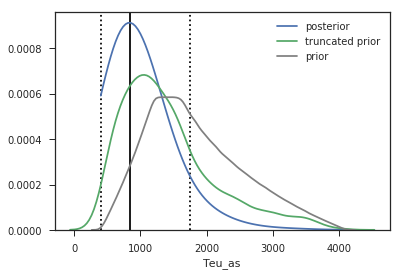

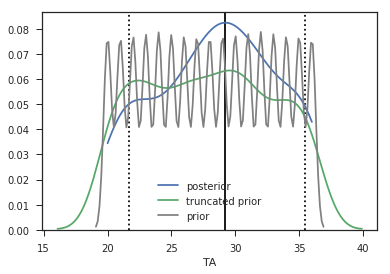

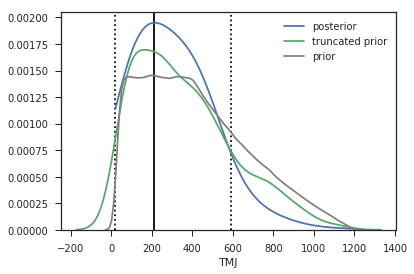

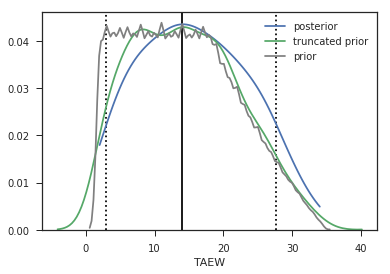

In [32]:
for param in params:
    plot_param_densities(posterior_pls, truncated_pls, prior_pls, df_chrs_reformat_pls, param)

#### Joint density plot

Create joint density dataframe

In [33]:
joint_NEA_NWA_df_pls = create_joint_df(jointPosterior_name)
joint_NEA_NWA_df_pls.head()

,number,Log10_NWA,Log10_NEA,density,HDI
0,0,3.00000,4.0,2.89802,0.997282
1,1,3.03737,4.0,3.07695,0.996633
2,2,3.07475,4.0,3.24135,0.995827
3,3,3.11212,4.0,3.38884,0.995046
4,4,3.14949,4.0,3.51763,0.994341


In [34]:
prob = get_prob_NEA_grtr_NWA(joint_NEA_NWA_df_pls)
print(prob)

0.6848261120381732


/mnt/src/ABC_results_AJ/functions/assessment_functions.py:221: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  Z = z.reshape(len(NEA), len(NWA))


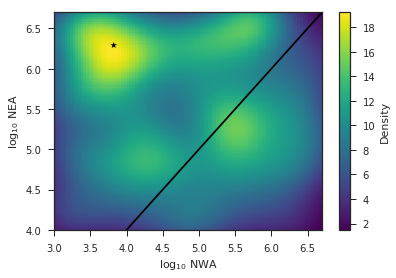

In [36]:
plot_joint_mtpltlb(joint_NEA_NWA_df_pls, df_chrs_reformat_pls)

## PLS Reduced Params

### Model 2

In [25]:
path = '/vol_c/ABC_AJmodels_instant_newreal/ReduceParams/PLS'
os.chdir(path)
abc_config_name = "test_ABC_estimate_PLS.txt"

[simName, obsName, outputPrefix, params_str] = read_abc_config(abc_config_name)
print(simName)

[BestSimsParamStats_name,
 MarginalPosteriorDensities_name,
 MarginalPosteriorCharacteristics_name,
 jointPosterior_name,
 MarginalPosteriorCharacteristics_reformat_name,
modelFit] = get_results_files(outputPrefix)
jointPosterior_name = '{}model0_jointPosterior_1_2_Obs0.txt'.format(outputPrefix)
print(BestSimsParamStats_name)
print(MarginalPosteriorDensities_name)
print(jointPosterior_name)
print(MarginalPosteriorCharacteristics_reformat_name)

test_ABC_estimate_PLS.txt
input_ABCtoolbox_M2_HPC_OSG_2.transformed_10pls.txt
ABC_M2_genome_estimate_1446124_10pls_1000ret_model0_BestSimsParamStats_Obs0.txt
ABC_M2_genome_estimate_1446124_10pls_1000ret_model0_MarginalPosteriorDensities_Obs0.txt
ABC_M2_genome_estimate_1446124_10pls_1000ret_model0_jointPosterior_1_2_Obs0.txt
ABC_M2_genome_estimate_1446124_10pls_1000ret_model0_MarginalPosteriorCharacteristicsReformat.txt


In [26]:
params_str
ranges = params_str.split(',')
print(ranges)
param_indexes = []
for values in ranges:
    if '-' in values:
        x = int(values.split('-')[0].strip()) - 1
        y = int(values.split('-')[1].strip())
        param_indexes.extend(list(range(x, y)))
    else:
        param_indexes.append(int(values) -1 )
print(param_indexes)

['10-15', '18', '20-23']
[9, 10, 11, 12, 13, 14, 17, 19, 20, 21, 22]


In [27]:
# param_indexes = get_param_indexes(params_str)
print(param_indexes)
params = get_col_names(param_indexes, prior)

[9, 10, 11, 12, 13, 14, 17, 19, 20, 21, 22]


#### Reformat marginal posterior densities charecterisitcs file

In [28]:
df_chrs_reformat_pls = reformat_Characteristics(MarginalPosteriorCharacteristics_name)
df_chrs_reformat_pls

parsing ABC_M2_genome_estimate_1446124_10pls_1000ret_model0_MarginalPosteriorCharacteristics.txt


/vol_c/src/ABC_results_AJ/functions/assessment_functions.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_param['param'] = param


,mode,mean,median,q50_lower,q50_upper,q90_lower,q90_upper,q95_lower,q95_upper,q99_lower,q99_upper,HDI50_lower,HDI50_upper,HDI90_lower,HDI90_upper,HDI95_lower,HDI95_upper,HDI99_lower,HDI99_upper,param
0,3.896970,4.767290,4.737070,3.921840,5.583030,3.256730,6.395350,3.142440,6.532090,3.031990,6.662440,3.541920,5.173030,3.168180,6.297860,3.093430,6.478160,3.000000e+00,6.627300,Log10_NWA
0,6.181820,5.468760,5.523080,4.864730,6.095410,4.242090,6.540270,4.133790,6.612980,4.030180,6.680850,5.377310,6.522730,4.388310,6.659090,4.242090,6.700000,4.058270e+00,6.700000,Log10_NEA
0,3.035240,3.163130,3.108620,2.687500,3.575450,2.212130,4.334620,2.117960,4.596040,2.026560,5.107200,2.588200,3.464170,2.057510,4.094010,2.000000,4.334620,2.000000e+00,4.900730,Log10_NAg
0,5.606060,5.132760,5.232910,4.751430,5.604740,3.985470,5.906050,3.723350,5.950900,3.265910,5.989700,5.137750,5.893940,4.279320,6.000000,3.985470,6.000000,3.429700e+00,6.000000,Log10_NJ
0,5.666670,5.171610,5.269330,4.806390,5.633180,4.035550,5.915610,3.772150,5.956200,3.322300,5.990910,5.227190,5.954550,4.343070,6.000000,4.035550,6.000000,3.488080e+00,6.000000,Log10_NM
0,0.161617,0.480591,0.479492,0.241888,0.708293,0.060897,0.923113,0.033201,0.957956,0.007318,0.990672,0.106061,0.567655,0.035307,0.893939,0.015152,0.937385,8.852980e-07,0.981881,m
0,480.808000,631.471000,583.525000,490.971000,737.297000,421.011000,1006.750000,410.878000,1074.220000,402.259000,1161.400000,404.040000,587.481000,400.000000,915.638000,400.000000,1006.750000,4.000000e+02,1133.710000,TEM
0,28.727300,28.049100,28.105700,24.297900,31.712900,21.053500,35.041100,20.568400,35.498100,20.123500,35.894000,24.628100,32.040400,21.212100,35.198100,20.727300,35.649300,2.015270e+01,35.919200,TA
0,211.384000,331.163000,306.125000,174.280000,458.938000,58.993400,706.960000,41.014800,805.915000,25.247800,992.908000,98.343400,369.616000,21.000000,605.065000,21.000000,706.960000,2.100000e+01,919.858000,TMJ
0,14.929300,15.949100,15.638400,9.993740,21.515900,4.310280,28.996000,3.287670,30.867500,2.290680,33.156600,9.113640,20.585900,3.085260,27.373700,2.000000,28.996000,2.000000e+00,32.464500,TAEW


#### Priors, truncated, and posterior distributions

In [29]:
prior_pls = pd.read_csv(simName, sep = '\t')
prior_pls.head()

,sim,Asc_NAF,Asc_NEU,Asc_NCHB,daf,Log10_NAF,Log10_NANC,Log10_NCEU,Log10_NCHB,Log10_NWA,...,LinearCombination_0,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9
0,5.281710e+14,14,17,8,0.052222,4.28044,4.00260,4.39113,4.26628,5.36560,...,1.125010,0.86040,2.423170,-1.240080,0.845003,-1.125590,0.981563,-3.112930,-2.369540,1.570150
1,5.281710e+14,8,4,14,0.053426,4.40487,3.58172,3.12320,4.21751,6.34165,...,10.571300,-7.41682,4.473280,-0.965474,4.215160,-0.527522,1.450910,-3.491500,-3.786360,2.616750
2,5.281710e+14,3,14,2,0.078333,3.92381,3.48373,3.09691,3.82373,3.28825,...,-5.533650,-3.17681,-4.261020,-1.686030,2.272880,1.961840,-1.393840,-0.596993,-0.301039,0.893576
3,5.291710e+14,7,3,7,0.072770,4.85489,4.37674,4.33554,4.87654,6.57905,...,-9.785690,4.81581,-0.450111,-0.057790,1.622090,-1.117200,-0.433007,0.778963,-0.293196,-0.013859
4,5.291710e+14,9,17,2,0.064633,4.90369,4.05652,3.63568,3.77291,5.50212,...,0.886967,4.40390,1.310930,1.441910,0.822246,-0.875576,0.238202,-4.099040,-1.115370,1.816170


In [30]:
truncated_pls = pd.read_csv(BestSimsParamStats_name, sep = '\t')
truncated_pls.head()

,Sim_num,Dist,Log10_NWA,Log10_NEA,Log10_NAg,Log10_NJ,Log10_NM,m,TEM,TA,...,LinearCombination_0,LinearCombination_1,LinearCombination_2,LinearCombination_3,LinearCombination_4,LinearCombination_5,LinearCombination_6,LinearCombination_7,LinearCombination_8,LinearCombination_9
0,264,16.8687,5.20517,5.42928,4.31800,4.99100,5.99025,0.869358,977,26,...,-14.4694,0.878387,-5.08654,1.787270,3.31941,3.30940,1.75454,1.881890,-1.808710,-2.009360
1,1117,15.8772,4.36596,5.46680,3.82191,4.45352,5.73917,0.685668,956,28,...,-14.1798,0.576015,-4.30848,1.535540,2.54265,2.58288,1.78050,1.356290,0.131996,-2.163160
2,1178,15.7531,5.64311,6.42956,3.12808,5.21696,4.90679,0.809115,936,31,...,-13.6000,0.248529,-5.32594,0.187016,2.82822,3.45323,2.10797,0.942264,-1.200940,-2.999570
3,2635,13.8534,5.42171,5.37913,3.21827,5.00241,3.50297,0.561099,873,24,...,-12.5832,0.729135,-2.31277,1.542970,3.18700,2.62611,1.40639,1.475900,-0.904433,-0.654759
4,3373,16.4925,6.30811,4.77425,3.95823,5.45537,5.50558,0.503875,1041,21,...,-13.6125,-2.511240,-1.17663,2.896810,3.33754,4.47957,1.29533,2.474460,-0.298918,-1.051090


In [31]:
posterior_pls = pd.read_csv(MarginalPosteriorDensities_name, sep = '\t')
posterior_pls.head()

,number,Log10_NWA,Log10_NWA.density,Log10_NEA,Log10_NEA.density,Log10_NAg,Log10_NAg.density,Log10_NJ,Log10_NJ.density,Log10_NM,...,TEM,TEM.density,TA,TA.density,TMJ,TMJ.density,TAEW,TAEW.density,Tm,Tm.density
0,1,3.00000,0.150884,4.00000,0.159277,2.00000,0.185842,3.00000,0.012729,3.00000,...,400.000,0.002214,20.0000,0.039569,21.000,0.001177,2.00000,0.016569,3.00000,0.001805
1,2,3.03737,0.163865,4.02727,0.170944,2.04706,0.207092,3.03030,0.014008,3.03030,...,408.081,0.002348,20.1616,0.042190,32.899,0.001266,2.32323,0.017992,3.32323,0.002031
2,3,3.07475,0.176863,4.05455,0.182312,2.09411,0.229528,3.06061,0.015333,3.06061,...,416.162,0.002473,20.3232,0.044721,44.798,0.001353,2.64646,0.019426,3.64646,0.002281
3,4,3.11212,0.189759,4.08182,0.193289,2.14117,0.253053,3.09091,0.016699,3.09091,...,424.242,0.002588,20.4848,0.047140,56.697,0.001435,2.96970,0.020861,3.96970,0.002559
4,5,3.14949,0.202440,4.10909,0.203800,2.18823,0.277543,3.12121,0.018107,3.12121,...,432.323,0.002690,20.6465,0.049426,68.596,0.001513,3.29293,0.022285,4.29293,0.002866


TypeError: cannot convert the series to <class 'float'>

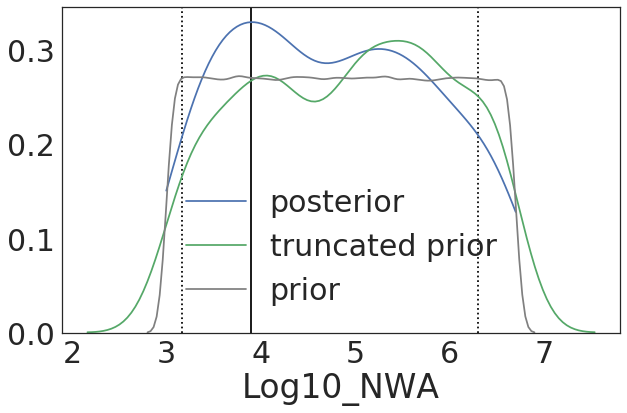

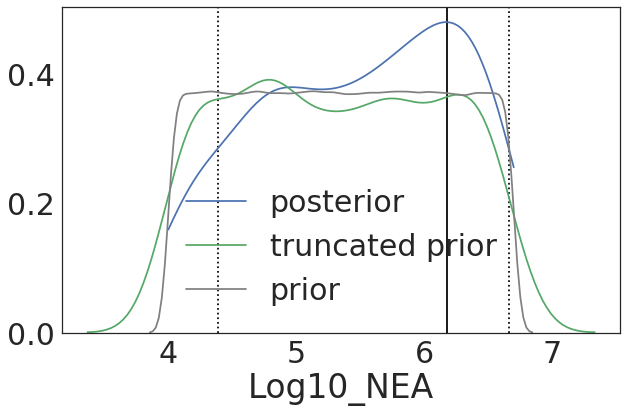

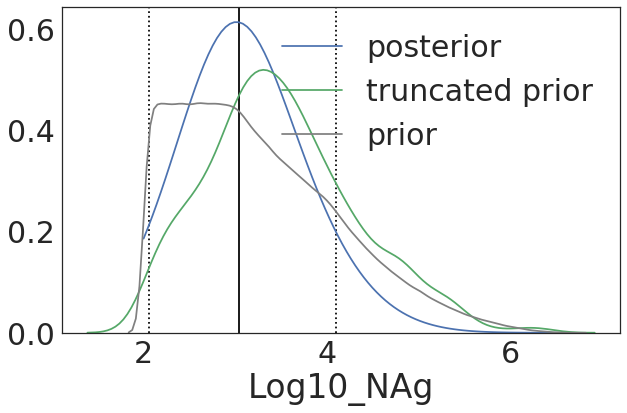

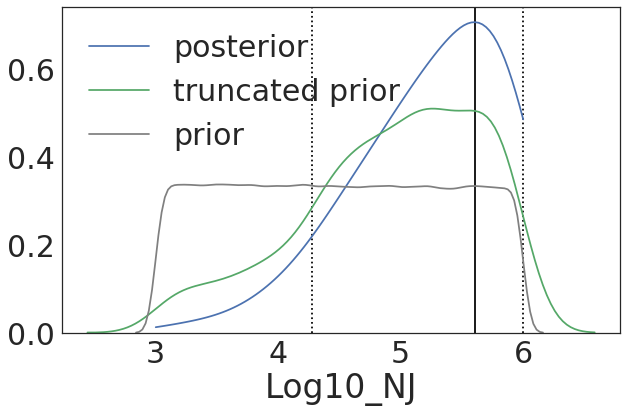

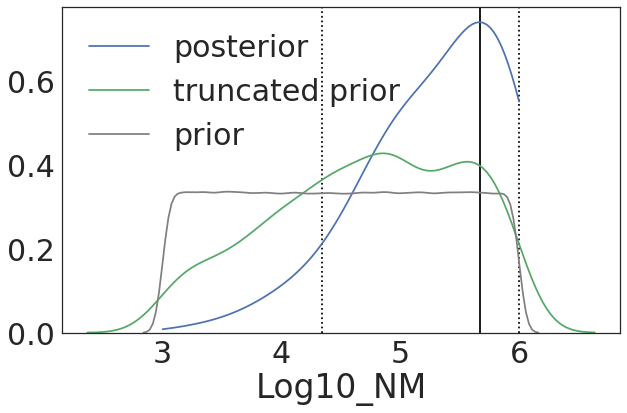

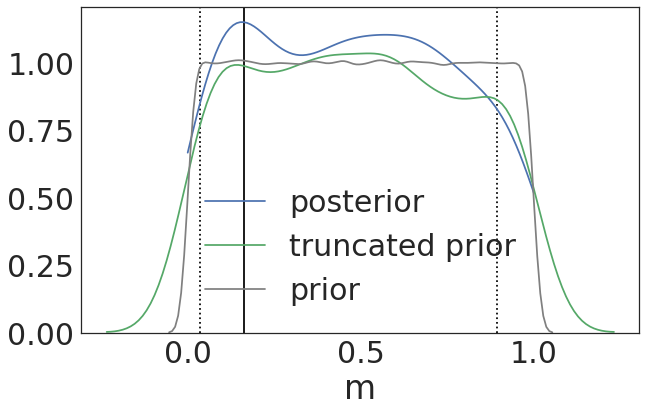

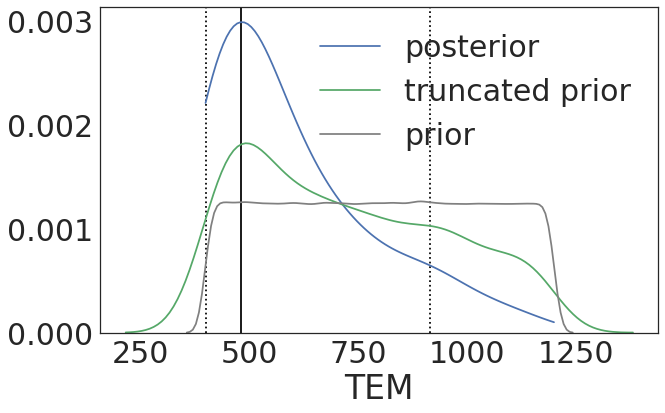

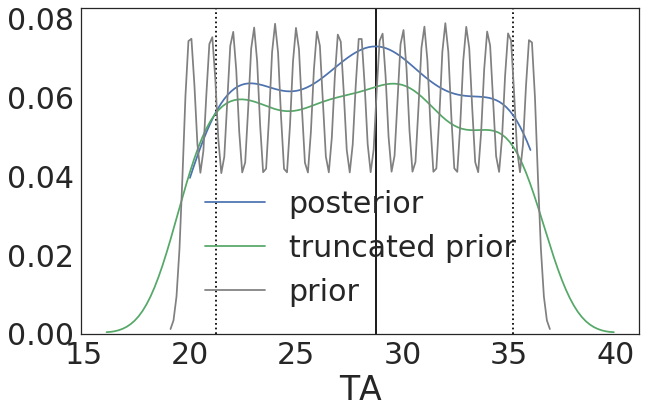

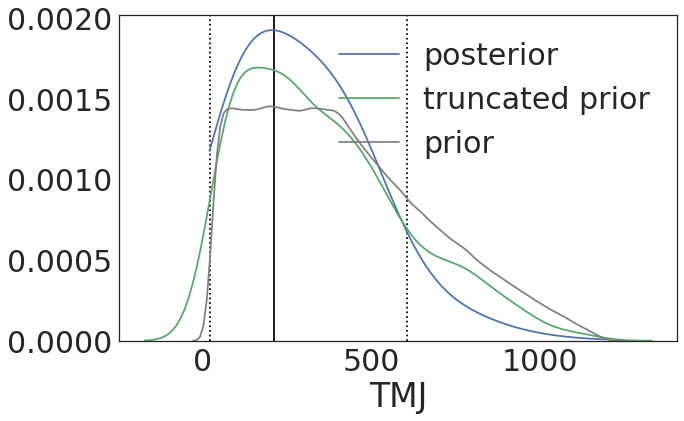

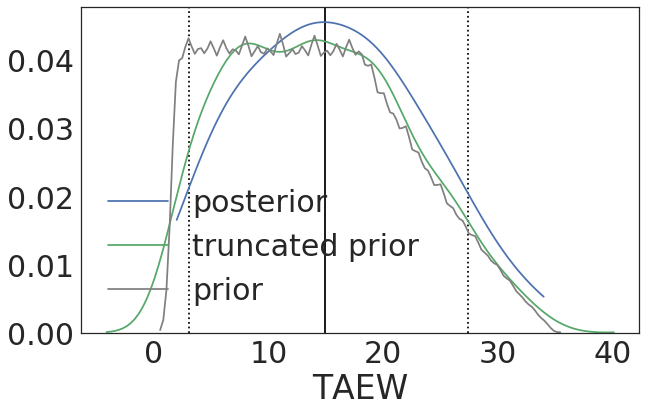

In [60]:
for param in params:
    plot_param_densities(posterior_pls, truncated_pls, prior_pls, df_chrs_reformat_pls, param)

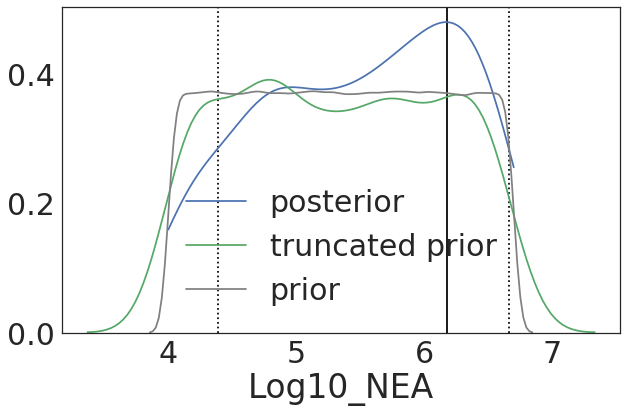

In [59]:
def plot_param_densities(posterior, truncated, prior, df_chrs_reformat, param):
    """
    Use matplotlib and seaborn to plot prior, truncated, and posterior distributions of parameter.
    :param posterior: dataframe of ABCtoolbox *MarginalPosteriorDensities_Obs0.txt
    :param truncated: dataframe of ABCtoolbox *BestSimsParamStats_Obs0.txt
    :param prior: dataframe of simulation input for ABCtoolbox
    :param param: string parameter name, which is the column name in the dataframes
    """

    mode = float(df_chrs_reformat['mode'].loc[df_chrs_reformat['param'] == param])
    HDI90_lower = float(df_chrs_reformat['HDI90_lower'].loc[df_chrs_reformat['param'] == param])
    HDI90_upper = float(df_chrs_reformat['HDI90_upper'].loc[df_chrs_reformat['param'] == param])

    sns.set(font_scale=3)
    sns.set_style("white")
    plt.figure(figsize=(10,6))
    plt.xlabel(param);
    plt.plot(posterior[param], posterior['{}.density'.format(param)], label='posterior');
    sns.kdeplot(truncated[param], label='truncated prior');
    sns.kdeplot(prior[param], color='grey', label='prior');
    ymin, ymax = plt.ylim()
    plt.vlines(mode, ymin, ymax, colors='black');
    plt.vlines(HDI90_lower, ymin, ymax, colors='black', linestyle='dotted');
    plt.vlines(HDI90_upper, ymin, ymax, colors='black', linestyle='dotted');
    plt.rc('font', size=50)
    return

plot_param_densities(posterior_pls, truncated_pls, prior_pls, df_chrs_reformat_pls, 'Log10_NEA')

#### Joint density plot

Create joint density dataframe

In [132]:
joint_NEA_NWA_df_pls = create_joint_df(jointPosterior_name)
joint_NEA_NWA_df_pls.head()

,number,Log10_NWA,Log10_NEA,density,HDI
0,0,3.00000,4.0,3.01049,0.998815
1,1,3.03737,4.0,3.17933,0.998333
2,2,3.07475,4.0,3.33231,0.997484
3,3,3.11212,4.0,3.46747,0.996770
4,4,3.14949,4.0,3.58347,0.995871


In [133]:
prob = get_prob_NEA_grtr_NWA(joint_NEA_NWA_df_pls)
print(prob)

0.6874846056572339


/mnt/src/ABC_results_AJ/functions/assessment_functions.py:221: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  NWA = np.unique(NWA)


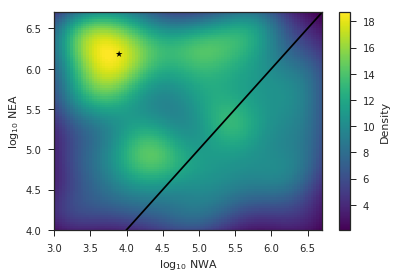

In [134]:
plot_joint_mtpltlb(joint_NEA_NWA_df_pls, df_chrs_reformat_pls)